# ECSE415 - Intro to Computer Vision
## Tutorial 3 - Image Processing in OpenCV

## OpenCV
Basic operations on images, accessing pixel values, splitting and merging images

### Creating an Image
- A grayscale image in OpenCV-Python is an intensity-based Numpy array

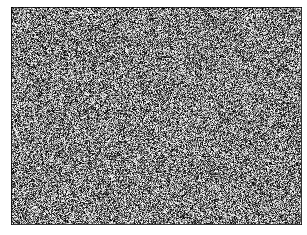

In [2]:
# creating an image
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = np.random.random((240,320))
plt.imshow(img, cmap="gray")
plt.xticks([]), plt.yticks([]) # remove axes ticks
plt.show() # display plot


(400, 318, 3)


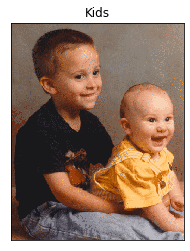

In [3]:
# load image
image_path = "./kids.tif" # use your own image path
img = cv2.imread(image_path)
# convert from BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# check shape of img
print(img.shape) # returns height,width, depth(number of channels)

# view image
plt.imshow(img), plt.title('Kids')
plt.xticks([]), plt.yticks([])
plt.show()

### Accessing and Modifying pixel values
- We can access/modify a pixel value by its row, column and channel (BGR) coordinates

img[50,100,0]: 35
img[50,100]: [ 35  59 108]


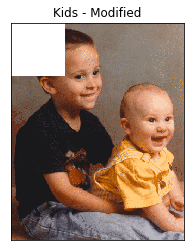

In [4]:
# accessing and modifying pixel values
img = cv2.imread(image_path)

# accessing the blue intensity of a single pixel (row, col, channel)
print("img[50,100,0]:", img[50,100,0])
# accessing all color channels
print("img[50,100]:", img[50,100])

# modifying pixel values
img[50,100] = [128,128,128]
#print("img[50,100]:", img[50,100])

# modifying an image region
img[0:100, 0:100] = 255
# convert from BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img), plt.title("Kids - Modified")
plt.xticks([]), plt.yticks([])
plt.show()

### Pixel Manipulation

Elapsed time: 3.3011271953582764


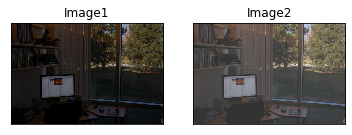

In [5]:
import time

# load image
image_path = "./office_2.jpg" # use your own image path
img = cv2.imread(image_path)
img2 = img.copy() # deep copy of the image
height, width, depth = img.shape # reading image size

t0 = time.time() # for performance measurement
for row in range(0, height):
    for col in range(0, width):
        for ch in range(0, depth):
            img2[row,col,ch] += 50 # brighten image
print("Elapsed time:", time.time() - t0) # there are a lot faster ways to do this

# convert from BGR to RGB for displaying
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

plt.subplot(121), plt.imshow(img) # 1x2 subplot, 1 selected
plt.title("Image1"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img2) # 1x2 subplot, 2 selected
plt.title("Image2"), plt.xticks([]), plt.yticks([])
plt.show()

### Image Thresholding


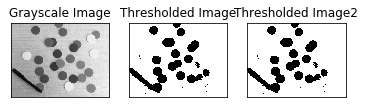

In [6]:
# load image
image_path = "./coloredChips.png"
img = cv2.imread(image_path)

# convert to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
height, width = img_gray.shape

# set the threshold
THRESH = 130

# create a placeholder for the output
img_thresh = np.zeros((height, width), dtype=np.uint8)

for row in range(0, height):
    for col in range(0, width):
        if img_gray[row,col] > THRESH:
            img_thresh[row, col] = 255

# same operation without loops
ret, img_thresh2 = cv2.threshold(img_gray, THRESH, 255, cv2.THRESH_BINARY)
# check more flags on https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_thresholding/py_thresholding.html

# display images
plt.subplot(131), plt.imshow(img_gray, cmap="gray")
plt.title("Grayscale Image"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(img_thresh, cmap="gray")
plt.title("Thresholded Image"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(img_thresh2, cmap="gray")
plt.title("Thresholded Image2"), plt.xticks([]), plt.yticks([])
plt.show()

### Image Filtering: Box Filter

kernel: [[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


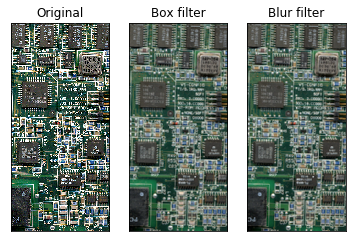

In [7]:
# image filtering
image_path = "./board.tif"
img = cv2.imread(image_path)

# create a box filter
kernel = np.ones((5,5), np.float32)/(5*5)
print("kernel:", kernel)

# filter the image
res1 = cv2.filter2D(img, -1, kernel)

# similar results using cv2.blur()
res2 = cv2.blur(img, (5,5))

# convert from BGR to RGB for displaying
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
res1 = cv2.cvtColor(res1, cv2.COLOR_BGR2RGB)
res2 = cv2.cvtColor(res2, cv2.COLOR_BGR2RGB)

# plot
plt.subplot(131), plt.imshow(img)
plt.title("Original"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(res1)
plt.title("Box filter"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(res2)
plt.title("Blur filter"), plt.xticks([]), plt.yticks([])
plt.show()

# plt.imshow(res1 - res2)
# plt.title("Box - Blur filter"), plt.xticks([]), plt.yticks([])
# plt.show()

### Image Filtering: Gaussian Filter

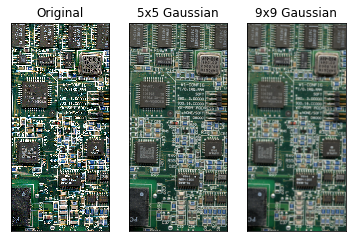

In [8]:
# image filtering
img = cv2.imread(image_path)

# filter image using 5x5 Gaussian, the std is calculated automatically
res1 = cv2.GaussianBlur(img, (5,5), 0)

# filter image using 9x9 Gaussian, the std is calculated automatically
res2 = cv2.GaussianBlur(img, (9,9), 0)

# convert from BGR to RGB for displaying
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
res1 = cv2.cvtColor(res1, cv2.COLOR_BGR2RGB)
res2 = cv2.cvtColor(res2, cv2.COLOR_BGR2RGB)

# plot
plt.subplot(131), plt.imshow(img)
plt.title("Original"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(res1)
plt.title("5x5 Gaussian"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(res2)
plt.title("9x9 Gaussian"), plt.xticks([]), plt.yticks([])
plt.show()

### Image Filtering: Median Filter


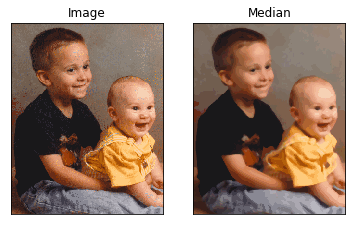

In [9]:
# image filtering
image_path = "./kids.tif"
img = cv2.imread(image_path)

# filter image using 5x5 median filter
res = cv2.medianBlur(img, 5)

# convert from BGR to RGB for displaying
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
res = cv2.cvtColor(res, cv2.COLOR_BGR2RGB)

# plot
plt.subplot(121), plt.imshow(img)
plt.title("Image"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(res)
plt.title("Median"), plt.xticks([]), plt.yticks([])
plt.show()

# Image Gradients and Canny Edge Detection

## Image Gradients: cv2.Sobel()
https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html#sobel

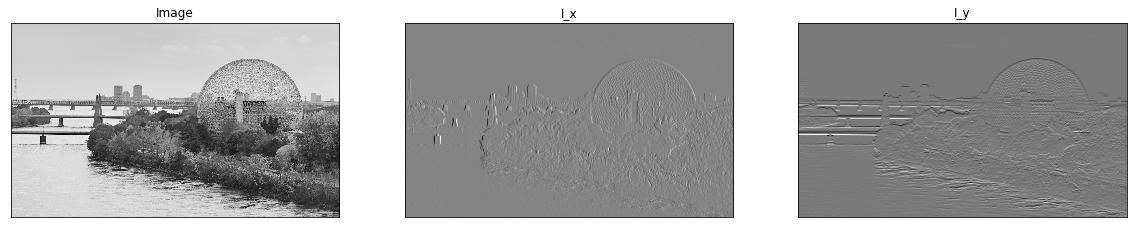

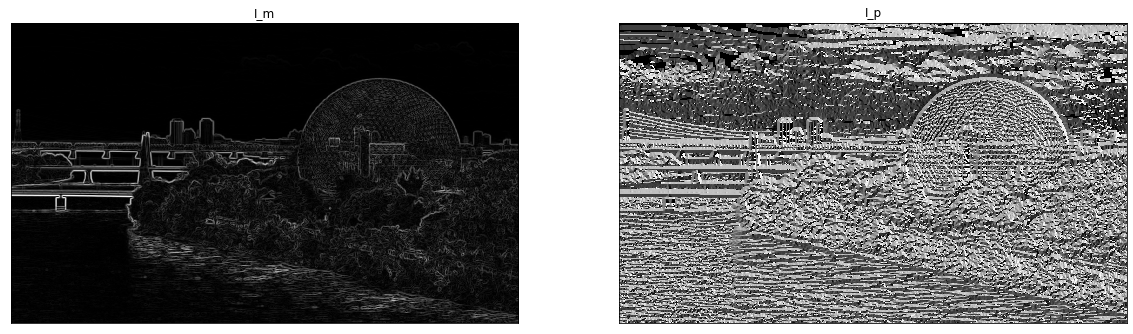

In [10]:
###################
# IMAGE GRADIENTS #
###################

# store image path
img_path = "biosphere.jpg"

# load the image as grayscale
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# apply 15x15 Sobel filters to the intensity channel
I_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=15)
I_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=15)
# compute sobel Magnitude/Phase
I_m = cv2.magnitude(I_x, I_y)
I_p = cv2.phase(I_x, I_y)

# display images
plt.figure(figsize=(20, 20))
plt.subplot(131), plt.imshow(img, cmap="gray")
plt.title("Image"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(I_x, cmap="gray")
plt.title("I_x"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(I_y, cmap="gray")
plt.title("I_y"), plt.xticks([]), plt.yticks([])

plt.figure(figsize=(20, 20))
plt.subplot(121), plt.imshow(I_m, cmap="gray")
plt.title("I_m"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(I_p, cmap="gray")
plt.title("I_p"), plt.xticks([]), plt.yticks([])
plt.show()

## Image Gradients: cv2.Laplacian
https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html#laplacian

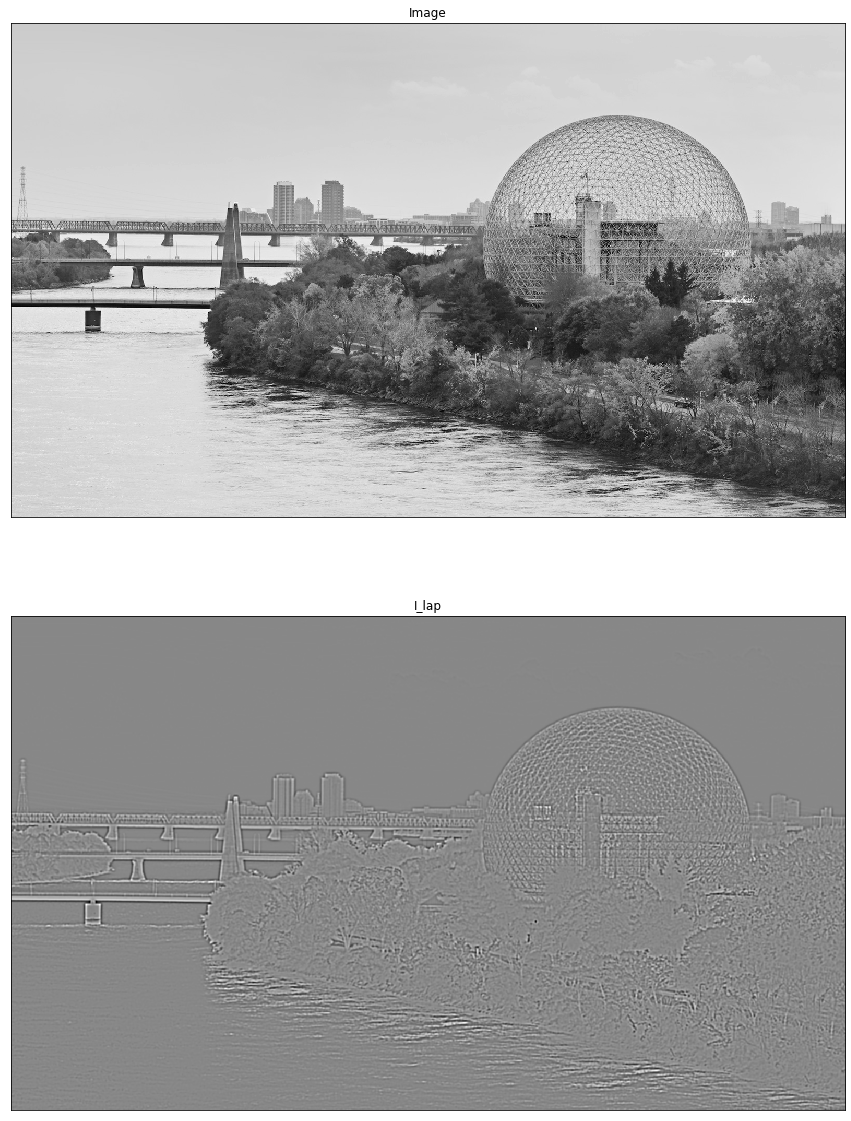

In [11]:
###################
# IMAGE GRADIENTS #
###################

# load the image as grayscale
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# apply 15x15 Laplacian filter to the intensity channel
I_lap = cv2.Laplacian(img, cv2.CV_32F, ksize=15)

# display images
plt.figure(figsize=(20, 20))
plt.subplot(211), plt.imshow(img, cmap="gray")
plt.title("Image"), plt.xticks([]), plt.yticks([])
plt.subplot(212), plt.imshow(I_lap, cmap="gray")
plt.title("I_lap"), plt.xticks([]), plt.yticks([])
plt.show()

## Canny Edge Detection: cv2.Canny()
https://docs.opencv.org/2.4/modules/imgproc/doc/feature_detection.html#canny

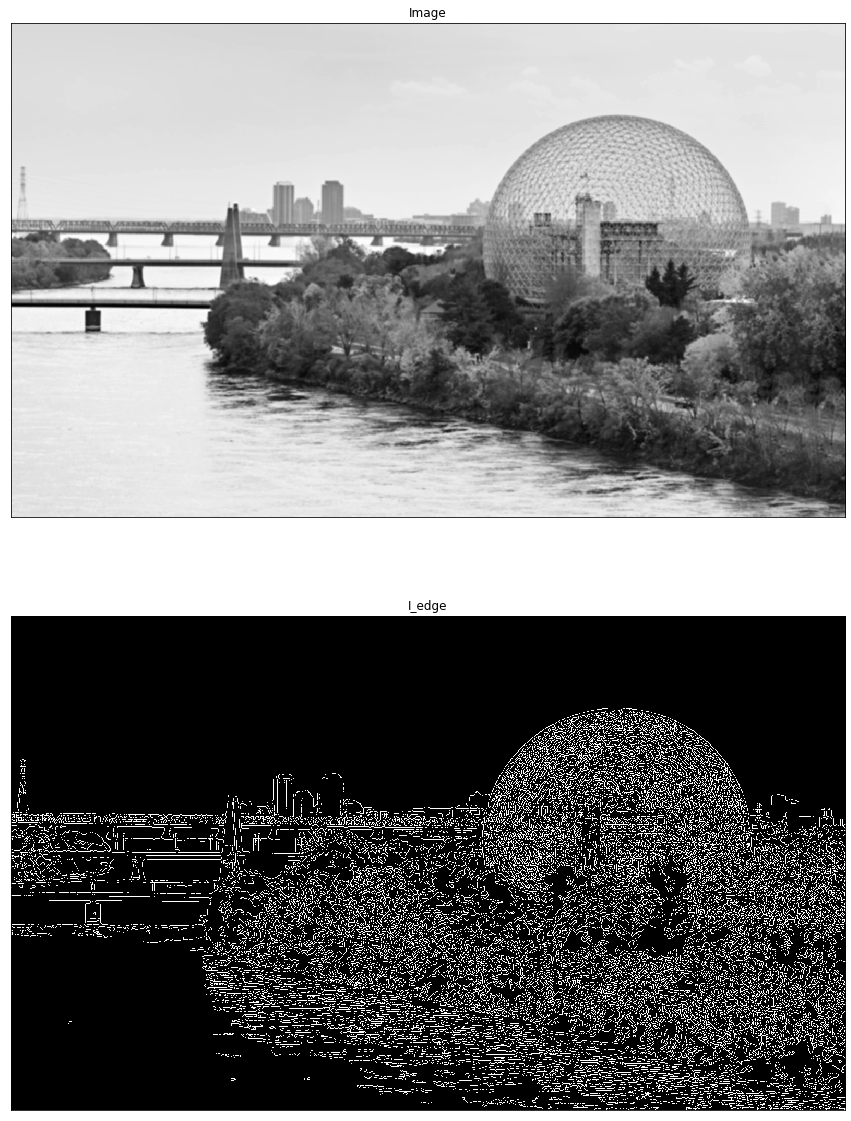

In [12]:
##################
# EDGE DETECTION #
##################

# load image as gray-scaled
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# blur image before-hand
img = cv2.GaussianBlur(img, (7, 7), 0)

# compute Canny edges
I_edge = cv2.Canny(img, 10, 50)
#I_edge = cv2.Canny(img, 50, 100)

# display images
plt.figure(figsize=(20, 20))
plt.subplot(211), plt.imshow(img, cmap="gray")
plt.title("Image"), plt.xticks([]), plt.yticks([])
plt.subplot(212), plt.imshow(I_edge, cmap="gray")
plt.title("I_edge"), plt.xticks([]), plt.yticks([])
plt.show()